# 1. Data preprocessing 
- All required libraries are imported
- Cleaned data is imported
- Separate dataset into independent variables (X) and target (y)
- Split into train_validation and test
- Scale dataset by StandardScaler

In [7]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, learning_curve 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

#importing merged and cleaned data 
df=pd.read_parquet('data/interim/df.parquet')

# Variable separation to independent features and target
X=df[['children', 'Hospital tier', 'City tier', 'patient age', 
                          'BMI', 'HBA1C', 'NumberOfMajorSurgeries', 'Heart Issues_yes', 'smoker_yes',
                                'Any Transplants_yes', 'Cancer history_Yes']]
y= df[['charges']]

#split data into train_val and test dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#convert 2D y to 1D 
y_train_val = np.ravel(y_train_val)
y_test = np.ravel(y_test)
# scaling 
SCaler = StandardScaler()
X_train_val_scaled = SCaler.fit_transform(X_train_val)
X_test_scaled = SCaler.transform(X_test)

# 2. Build ML models
- Define a function for learning curve to check overfitting / underfitting of 8 models (below):
- Linear Regression, Ridge Regression, Lasso Regression
- Decision Tree Regression, Random Forest Regression
- Support Vector Regression (SVR), K-Nearest Neighbors (KNN) Regression, 
- XGBoost Regression

In [8]:
#train size split
train_sizes = np.linspace(0.1,1,10)
cv = KFold(n_splits = 5, shuffle =True, random_state = 42)
def plot_learning_curve(model, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator = model, 
        X = X_train_val_scaled, 
        y = y_train_val, 
        cv=5, 
        scoring="neg_mean_squared_error", 
        train_sizes= np.linspace(0.1,1,10)
    )
    train_mean, val_mean = np.mean(train_scores, axis=1), np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label="Train", markersize = 5)
    plt.plot(train_sizes, val_mean, 'o-', label="Validation", markersize = 5)
    plt.title(title)
    plt.xlabel("Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.legend()
    plt.grid(True)
    plt.show()


# 3. Evaluate overfitting / underfitting for the eight ML methods

plots are here:


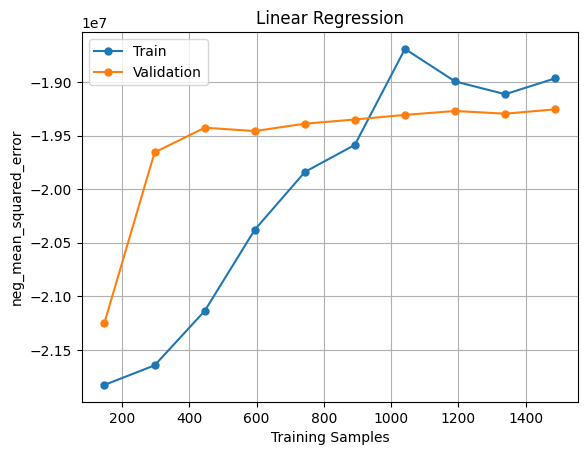

<Figure size 640x480 with 0 Axes>

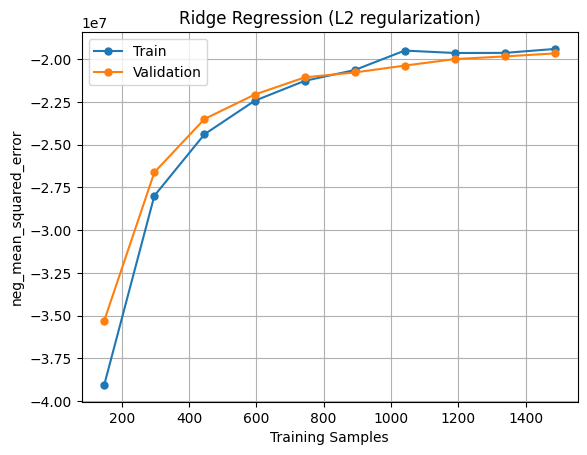

<Figure size 640x480 with 0 Axes>

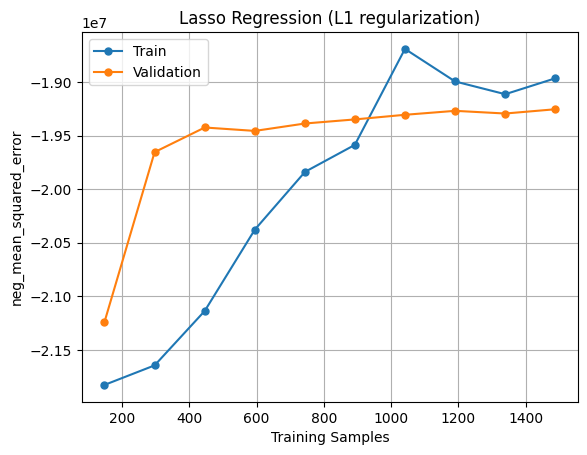

<Figure size 640x480 with 0 Axes>

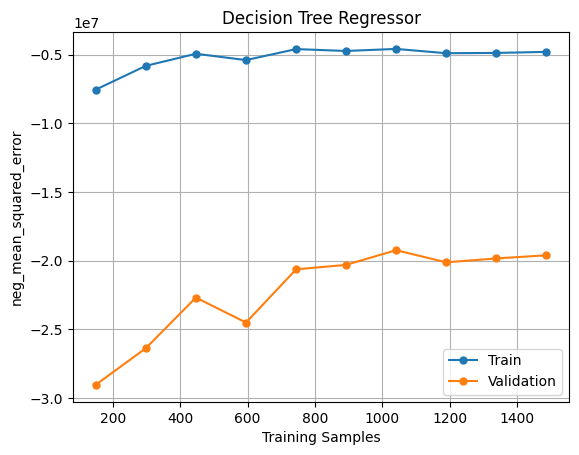

<Figure size 640x480 with 0 Axes>

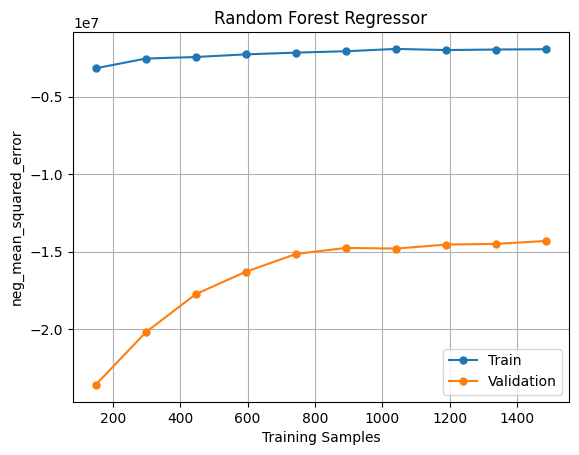

<Figure size 640x480 with 0 Axes>

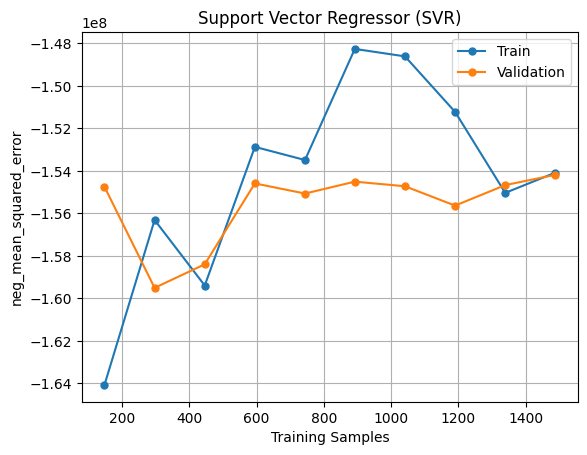

<Figure size 640x480 with 0 Axes>

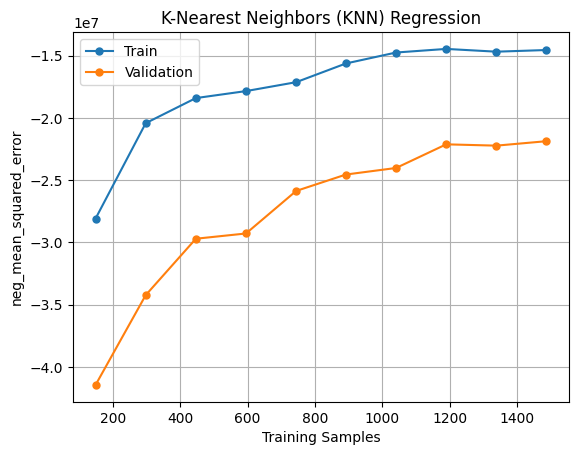

<Figure size 640x480 with 0 Axes>

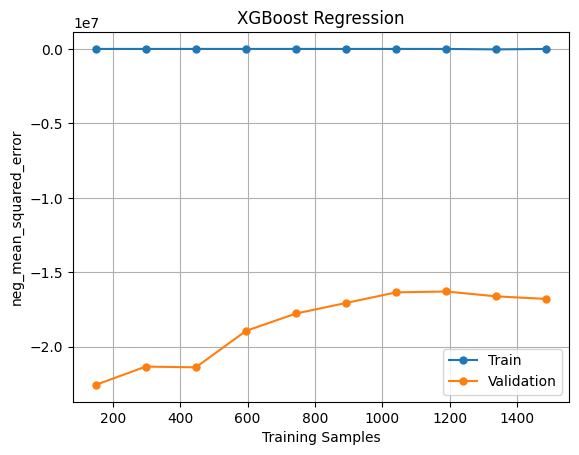

<Figure size 640x480 with 0 Axes>

In [14]:
# LinearRegression
print("plots are here:")
model = LinearRegression()
plot_learning_curve(model, "Linear Regression")
plt.savefig('plots/Linear_Regression.png')
plt.show()
# Ridge Regression (L2 regularization)
model = Ridge(alpha = 10e1 )
plot_learning_curve(model, "Ridge Regression (L2 regularization)")
plt.savefig('plots/Ridge_Regression_(L2_regularization).png')
plt.show()
# Lasso Regression (L1 regularization)
model = Lasso(alpha = 1)
plot_learning_curve(model, "Lasso Regression (L1 regularization)")
plt.savefig('plots/Lasso_Regression_(L1_regularization).png')
plt.show()
# Decision Tree Regression
model = DecisionTreeRegressor(max_depth=15,
                              min_samples_leaf=3,
                              random_state=42)
plot_learning_curve(model, "Decision Tree Regressor")
plt.savefig('plots/Decision_Tree_Regressor.png')
plt.show()
# Random Forest Regression
model = RandomForestRegressor(n_estimators=100,
                              max_depth = None,
                              max_features = 1.0,
                              min_samples_leaf = 1,
                              random_state=42
                              )
plot_learning_curve(model, "Random Forest Regressor")
plt.savefig('plots/Random_Forest_Regressor.png')
plt.show()
# Support Vector Regression (SVR)
model = SVR(kernel='rbf',
            gamma='scale',
             C=1.0,
            epsilon=0.1      
           )

plot_learning_curve(model, "Support Vector Regressor (SVR)")
plt.savefig('plots/Support_Vector_Regressor_(SVR).png')
plt.show()
# K-Nearest Neighbors (KNN) Regression
model = KNeighborsRegressor(n_neighbors=5)
plot_learning_curve(model, "K-Nearest Neighbors (KNN) Regression")
plt.savefig('plots/K-Nearest_Neighbors_(KNN)_Regression.png')
plt.show()
# XGBoost Regression
model = XGBRegressor(n_estimators=1000,
                     random_state=42, 
                     eval_metric='rmse'
                    )
plot_learning_curve(model, "XGBoost Regression")
plt.savefig('plots/XGBoost_Regression.png')
plt.show()

plots are here:


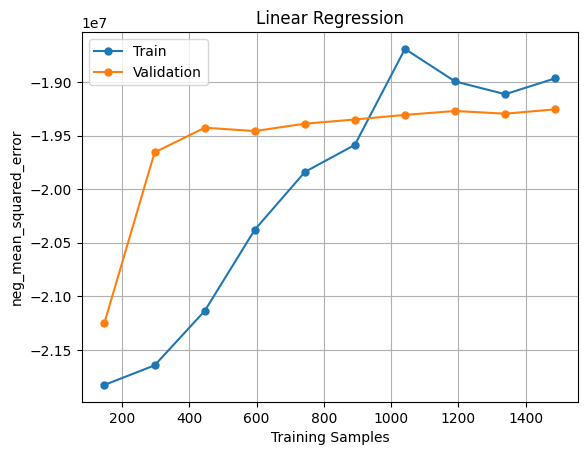

<Figure size 640x480 with 0 Axes>

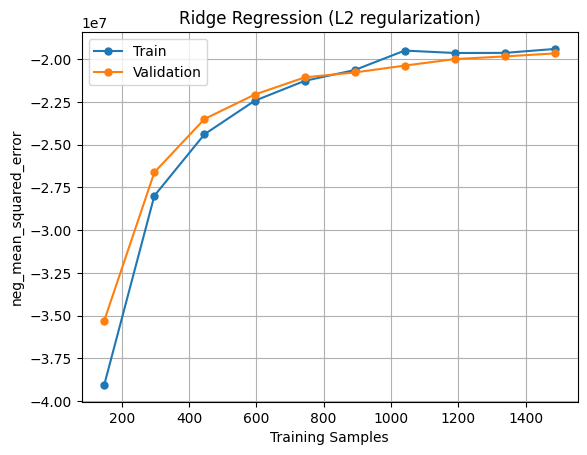

<Figure size 640x480 with 0 Axes>

In [16]:
import os
os.makedirs('plots', exist_ok=True)

# LinearRegression
print("plots are here:")
model = LinearRegression()
plot_learning_curve(model, "Linear Regression")
plt.savefig('plots/Linear_Regression.png', dpi=300, bbox_inches='tight')
plt.show()

# Ridge Regression (L2 regularization)
model = Ridge(alpha=10e1)
plot_learning_curve(model, "Ridge Regression (L2 regularization)")
plt.savefig('plots/Ridge_Regression_(L2_regularization).png', dpi=300, bbox_inches='tight')
plt.show()

# Continue for all models...

**Results of overfitting / underfitting analysis of the models**
- From the models >>> the most well fit is Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization)
- Next step is hyperparameters tunning of the models

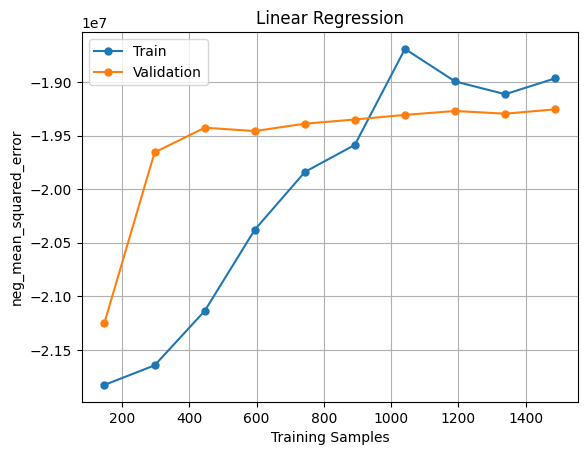

<Figure size 640x480 with 0 Axes>

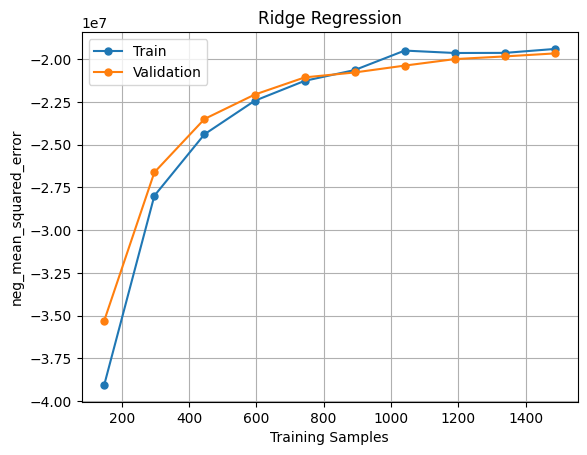

<Figure size 640x480 with 0 Axes>

In [17]:
def plot_and_save_learning_curve(estimator, title, filename):
    """Wrapper function that plots and saves the learning curve"""
    plot_learning_curve(estimator, title)
    plt.savefig(f'plots/{filename}', dpi=300, bbox_inches='tight')
    plt.show()

# Usage
plot_and_save_learning_curve(LinearRegression(), "Linear Regression", "Linear_Regression.png")
plot_and_save_learning_curve(Ridge(alpha=10e1), "Ridge Regression", "Ridge_Regression.png")
# ... and so on for all models

Generating learning curves...


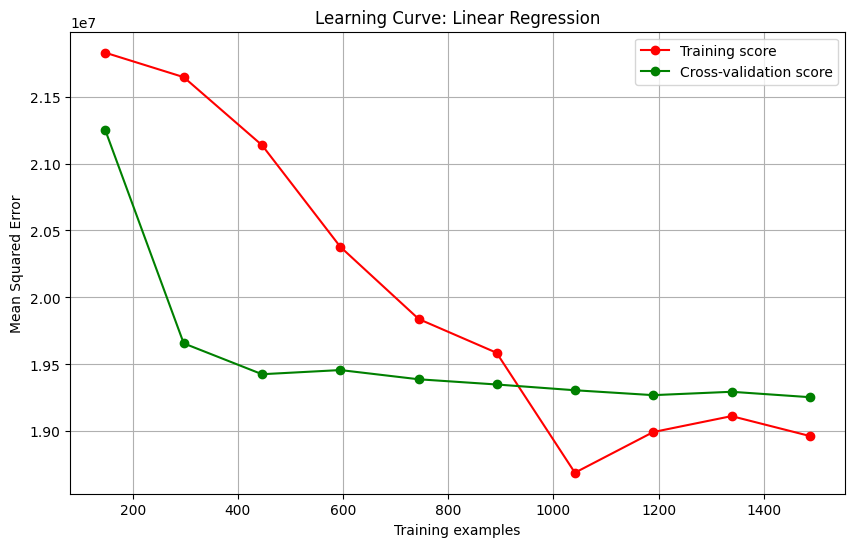

✓ Successfully saved: plots/Linear_Regression.png


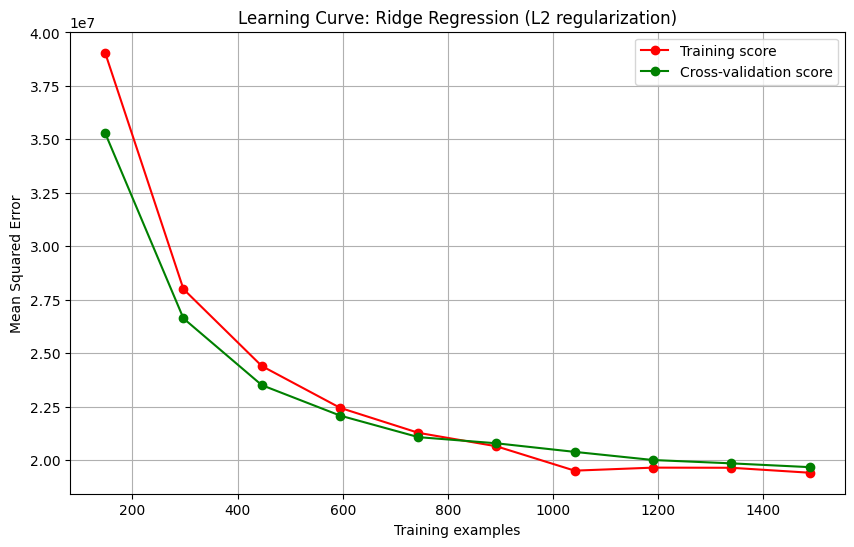

✓ Successfully saved: plots/Ridge_Regression_L2.png


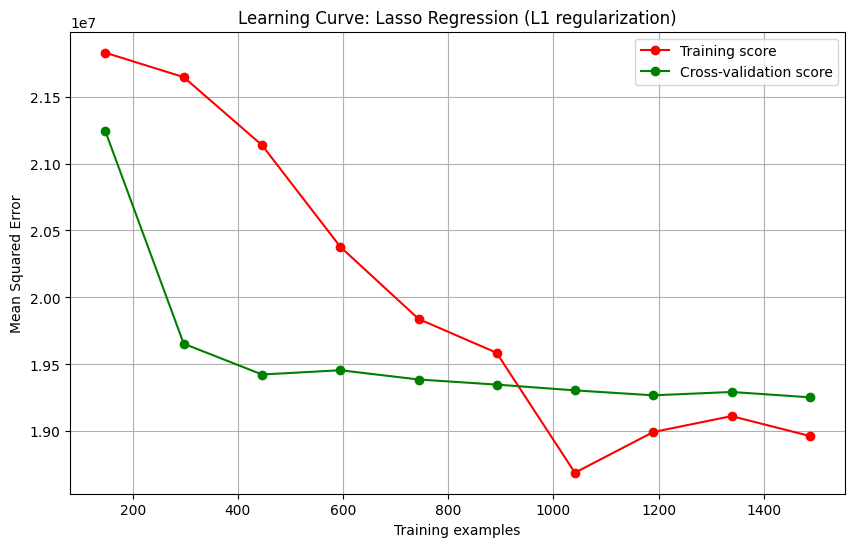

✓ Successfully saved: plots/Lasso_Regression_L1.png


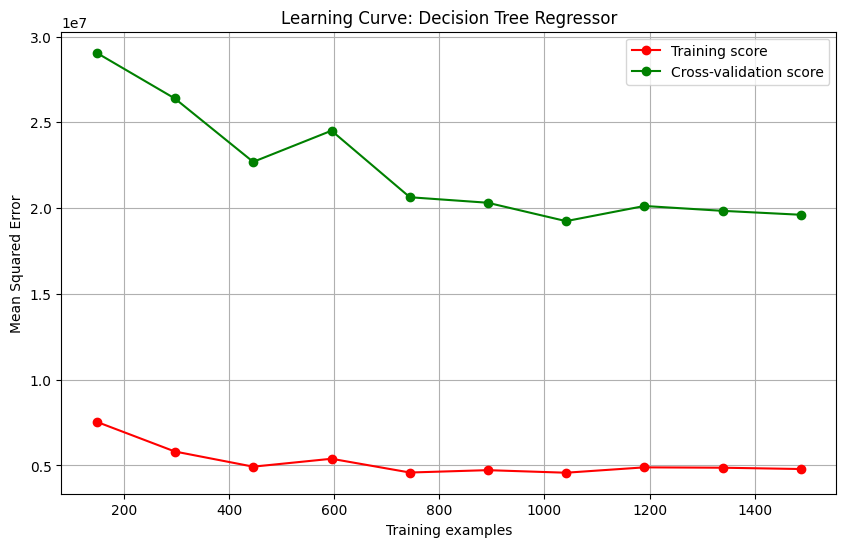

✓ Successfully saved: plots/Decision_Tree_Regressor.png


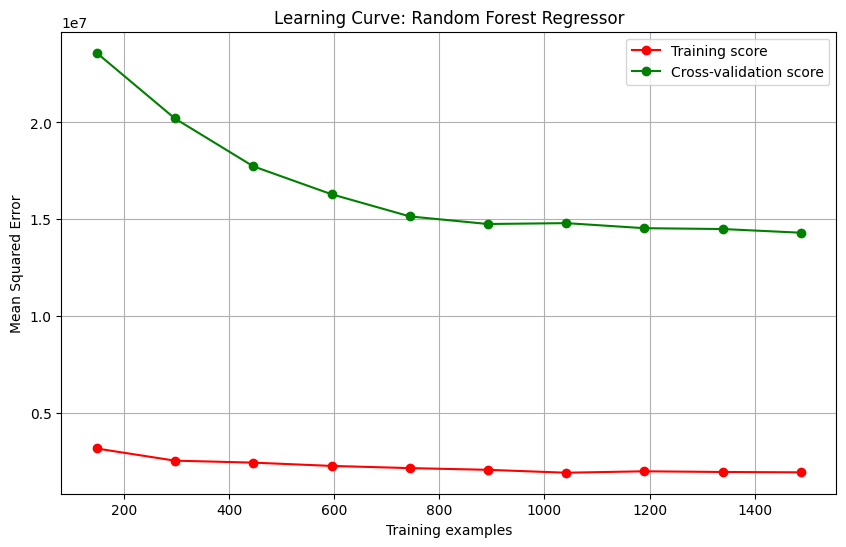

✓ Successfully saved: plots/Random_Forest_Regressor.png


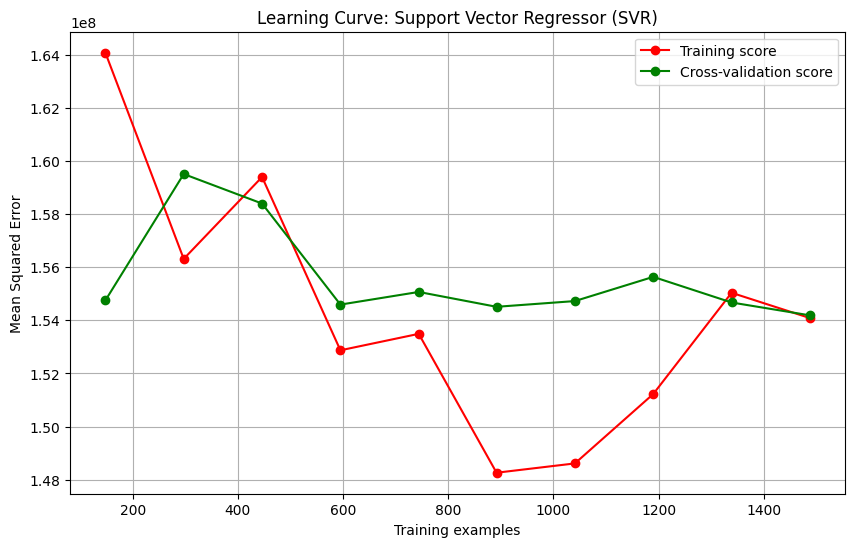

✓ Successfully saved: plots/Support_Vector_Regressor_SVR.png


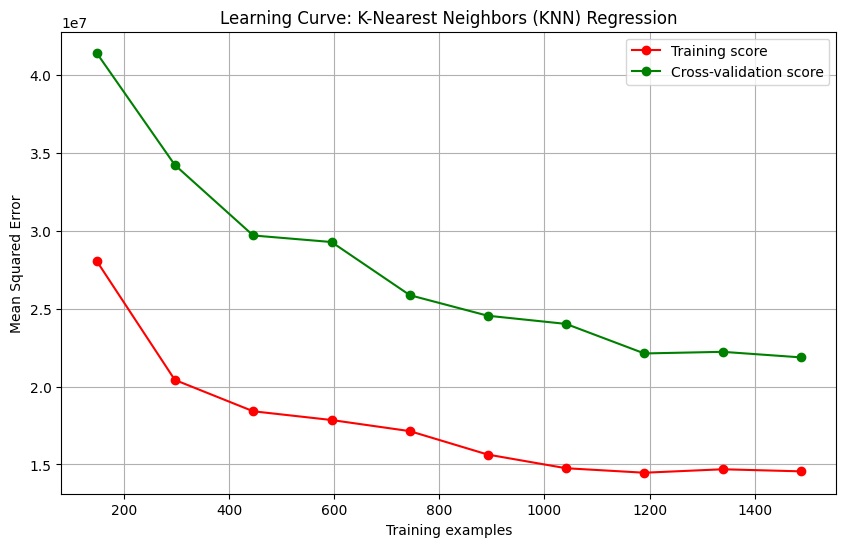

✓ Successfully saved: plots/KNN_Regression.png


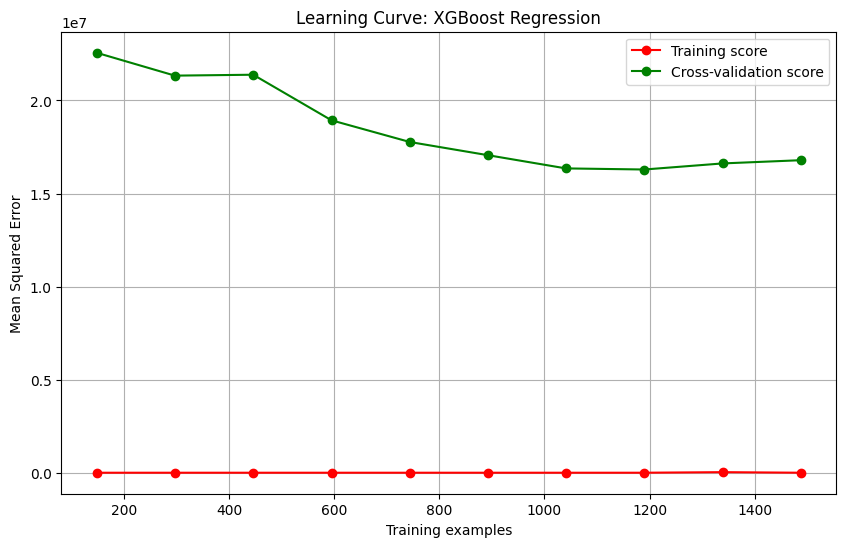

✓ Successfully saved: plots/XGBoost_Regression.png
All plots generated!


In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Create plots directory
os.makedirs('plots', exist_ok=True)

def safe_plot_learning_curve(estimator, title, filename):
    """
    Safely plot and save learning curve without white screen issue
    """
    try:
        # Create a new figure
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Generate learning curve data
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X_train_val_scaled, y_train_val, cv=5,
            scoring='neg_mean_squared_error', 
            train_sizes=np.linspace(0.1, 1.0, 10),
            random_state=42
        )
        
        # Calculate means
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        
        # Plot
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Mean Squared Error")
        ax.set_title(f"Learning Curve: {title}")
        ax.legend(loc="best")
        ax.grid(True)
        
        # Save the figure
        plt.savefig(f'plots/{filename}', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close(fig)  # Important: close the figure
        
        print(f"✓ Successfully saved: plots/{filename}")
        
    except Exception as e:
        print(f"✗ Error with {title}: {e}")

# Now run all models
print("Generating learning curves...")

models = [
    (LinearRegression(), "Linear Regression", "Linear_Regression.png"),
    (Ridge(alpha=10e1), "Ridge Regression (L2 regularization)", "Ridge_Regression_L2.png"),
    (Lasso(alpha=1), "Lasso Regression (L1 regularization)", "Lasso_Regression_L1.png"),
    (DecisionTreeRegressor(max_depth=15, min_samples_leaf=3, random_state=42), 
     "Decision Tree Regressor", "Decision_Tree_Regressor.png"),
    (RandomForestRegressor(n_estimators=100, max_depth=None, max_features=1.0, 
                          min_samples_leaf=1, random_state=42), 
     "Random Forest Regressor", "Random_Forest_Regressor.png"),
    (SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.1), 
     "Support Vector Regressor (SVR)", "Support_Vector_Regressor_SVR.png"),
    (KNeighborsRegressor(n_neighbors=5), 
     "K-Nearest Neighbors (KNN) Regression", "KNN_Regression.png"),
    (XGBRegressor(n_estimators=1000, random_state=42, eval_metric='rmse'), 
     "XGBoost Regression", "XGBoost_Regression.png")
]

for model, title, filename in models:
    safe_plot_learning_curve(model, title, filename)

print("All plots generated!")

# 4. Hyperparameters tunning
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)

In [10]:
# Lasso Regression (L1 regularization)
estimator_L1 = Lasso()
param_dist_L1 = {
    'alpha': np.logspace(-3, 3, 10)
}
# Ridge Regression (L2 regularization)
estimator_L2 = Ridge()
param_dist_L2 = {
    'alpha': np.logspace(-3, 3, 10)
}

# Define RandomizedSearchCV function
def hyperparameters_tunning(estimator_m, param_dist, n, cv_m):
    random_search = RandomizedSearchCV(
        estimator=estimator_m,
        param_distributions=param_dist,
        n_iter=n,
        cv=cv_m,
        scoring='neg_mean_squared_error',
        random_state=42,
        verbose=1
    )
    return random_search
print("*********************************************************")
# Hyperparameter tuning for Lasso Regression
print("Tuning Lasso Regression...")
lasso_search = hyperparameters_tunning(estimator_L1, param_dist_L1, 10, 5)
lasso_search.fit(X_train_val_scaled, y_train_val)

# Get best model and evaluate
best_lasso_model = lasso_search.best_estimator_
best_lasso_params = lasso_search.best_params_
lasso_test_score = best_lasso_model.score(X_test_scaled, y_test)

print(f"Lasso - Best parameters: {best_lasso_params}")
print(f"Lasso - Best CV score: {lasso_search.best_score_:.4f}")
print(f"Lasso - Test set R² score: {lasso_test_score:.4f}")

# Calculate test MSE for better interpretation
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso - Test set MSE: {test_mse_lasso:.4f}")
print("*********************************************************")
# Hyperparameter tuning for Ridge Regression
print("\nTuning Ridge Regression...")
ridge_search = hyperparameters_tunning(estimator_L2, param_dist_L2, 10, 5)
ridge_search.fit(X_train_val_scaled, y_train_val)

# Get best model and evaluate
best_ridge_model = ridge_search.best_estimator_
best_ridge_params = ridge_search.best_params_
ridge_test_score = best_ridge_model.score(X_test_scaled, y_test)

print(f"Ridge - Best parameters: {best_ridge_params}")
print(f"Ridge - Best CV score: {ridge_search.best_score_:.4f}")
print(f"Ridge - Test set R² score: {ridge_test_score:.4f}")

# Calculate test MSE
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge - Test set MSE: {test_mse_ridge:.4f}")
print("*********************************************************")


*********************************************************
Tuning Lasso Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Lasso - Best parameters: {'alpha': np.float64(46.41588833612773)}
Lasso - Best CV score: -19231998.9332
Lasso - Test set R² score: 0.8357
Lasso - Test set MSE: 23429492.2760
*********************************************************

Tuning Ridge Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge - Best parameters: {'alpha': np.float64(2.154434690031882)}
Ridge - Best CV score: -19254493.9437
Ridge - Test set R² score: 0.8359
Ridge - Test set MSE: 23403632.4924
*********************************************************


**Best paramters, Cv score, R2 score and MSE calculated in above cell for Ridge and Lasso**
- Two more curves () will be plotted in next cell

# 5. Performance comparison between ML models

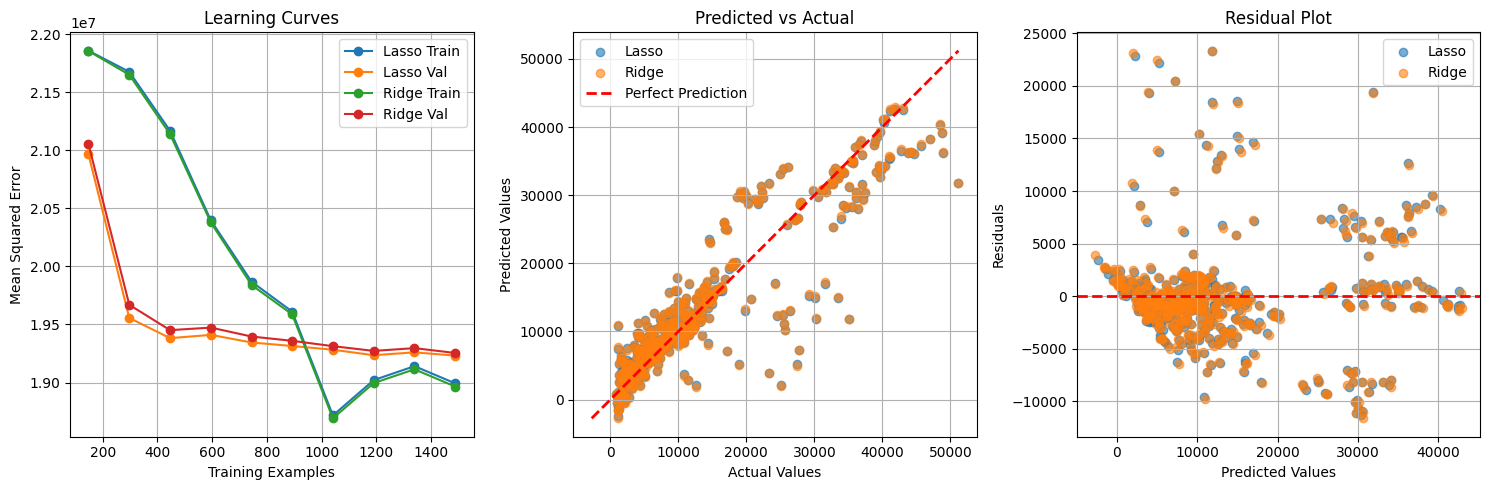

Model Performance Metrics:
Lasso           | MSE: 23429492.2760 | R²: 0.8357
Ridge           | MSE: 23403632.4924 | R²: 0.8359


In [11]:
def comprehensive_model_comparison(models, model_names, X_train, X_test, y_train, y_test):    
    # 1. Learning Curves
    from sklearn.model_selection import learning_curve
    
    plt.figure(figsize=(15, 5))
    
    # Learning Curve
    plt.subplot(1, 3, 1)
    for model, name in zip(models, model_names):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, 
            scoring='neg_mean_squared_error',
            train_sizes=np.linspace(0.1, 1.0, 10)
        )
        
        plt.plot(train_sizes, -np.mean(train_scores, axis=1), 'o-', label=f'{name} Train')
        plt.plot(train_sizes, -np.mean(test_scores, axis=1), 'o-', label=f'{name} Val')
    
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.savefig('plots/Learning_Curves.png')
    # 2. Prediction vs Actual
    plt.subplot(1, 3, 2)
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    
    max_val = max(y_test.max(), max(model.predict(X_test).max() for model in models))
    min_val = min(y_test.min(), min(model.predict(X_test).min() for model in models))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual')
    plt.legend()
    plt.grid(True)
    plt.savefig('plots/Predicted_vs_Actual.png')
    # 3. Residual Plot
    plt.subplot(1, 3, 3)
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        plt.scatter(y_pred, residuals, alpha=0.6, label=name)
    
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('plots/Residual_Plot.png')
    plt.show()
    
    # Print numerical metrics
    print("Model Performance Metrics:")
    print("=" * 50)
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name:15} | MSE: {mse:.4f} | R²: {r2:.4f}")

# Usage
models = [best_lasso_model, best_ridge_model]
model_names = ['Lasso', 'Ridge']
comprehensive_model_comparison(models, model_names, X_train_val_scaled, X_test_scaled, y_train_val, y_test)

# 6. Save the best model
- Ridge regression showed slighly better performace
- The best model will be saved is saved

In [12]:
# Save your trained model
joblib.dump(best_ridge_model, 'ML_model.pkl')
print("Model saved successfully!")

Model saved successfully!
